In [1]:
import pandas as pd

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")
web_scrapper_data = pd.read_csv("final data/output.csv")

fake['target'] = 'fake'
true['target'] = 'true'

data = pd.concat([fake, true, web_scrapper_data]).reset_index(drop = True)


In [2]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)


data.drop(["title"],axis=1,inplace=True)
data.drop(["subject"],axis=1,inplace=True)
data.drop(["date"],axis=1,inplace=True)

In [3]:
data['text'] = data['text'].apply(lambda x: str(x))
data['text'] = data['text'].apply(lambda x: x.lower())

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [4]:
data


,text,target
0,dinesh made some frightening predictions in hi...,fake
1,nan,fake
2,21st century wire says as it turns out we were...,fake
3,john terry has admitted chelseas players are c...,true
4,harare reuters a smiling president robert mug...,true
...,...,...
73200,they threw everything but the kitchen sink at ...,fake
73201,the shocking revelations just keep on coming i...,fake
73202,reuters members of maná the spanishlanguage p...,true
73203,washington reuters us president donald trump ...,true


In [5]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


[nltk_data] Downloading package stopwords to /home/akshay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


target
fake    39197
true    34008
Name: text, dtype: int64


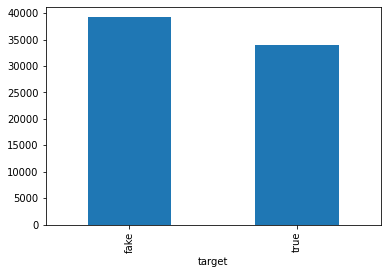

In [7]:
from matplotlib import pyplot as plt
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [8]:
from nltk import tokenize
import seaborn as sns
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

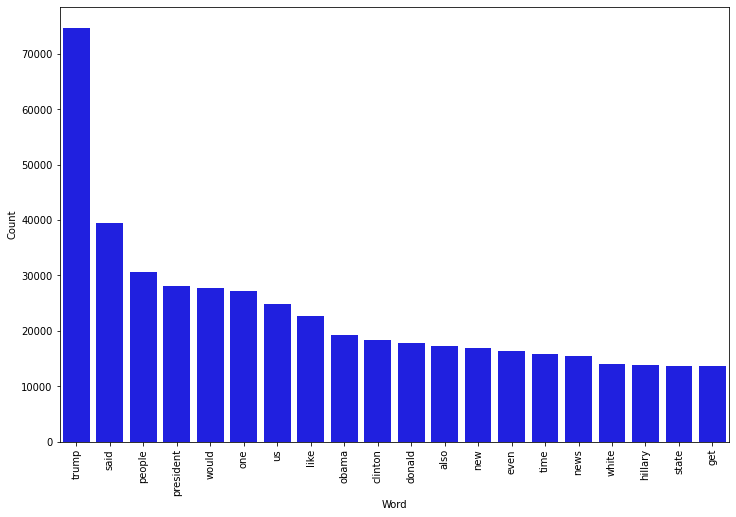

In [9]:
counter(data[data["target"] == "fake"], "text", 20)

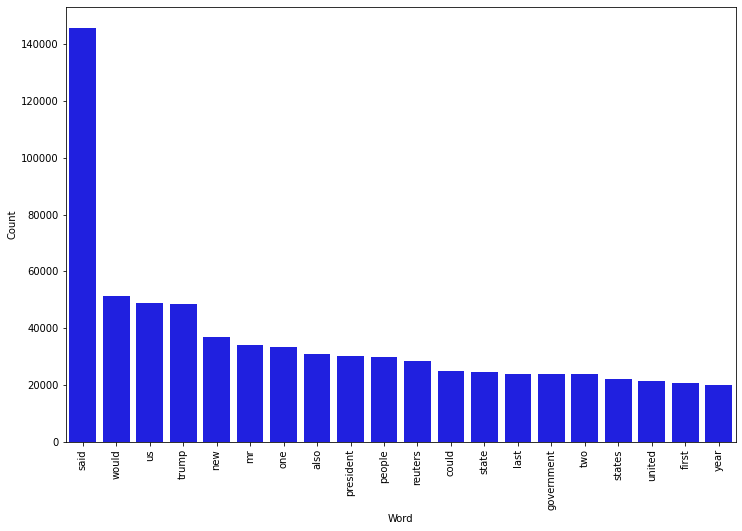

In [10]:
counter(data[data["target"] == "true"], "text", 20)

In [11]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [13]:
# Vectorizing and applying TF-IDF
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])# Fitting the model
model = pipe.fit(X_train, y_train)# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 97.7%


Confusion matrix, without normalization


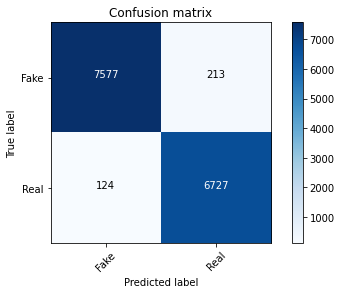

In [14]:
import numpy as np
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [16]:
from sklearn.tree import DecisionTreeClassifier# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 93.64%


Confusion matrix, without normalization


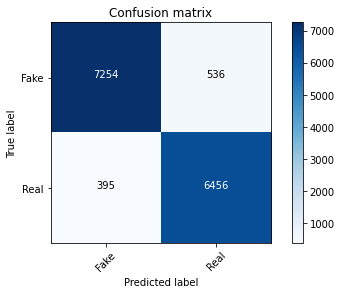

In [17]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [19]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 95.2%


Confusion matrix, without normalization


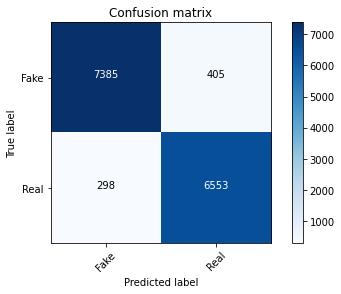

In [20]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])